In [10]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd

In [11]:
# Set filepath
REPOSITORY='/home/ebb505/ARE_Project/are-logs/temp_0808/'
FILENAME='MD_Cart_WDH.csv'
LHSSELECTION='LHSSelection.csv'
CLUSTERRANDSELECTION='ClusterRandomSelection.csv'
CLUSTERSORTEDSELECTION='ClusterSortedSelection.csv'
SPARSENESSSORTEDSELECTION='sortSelection.csv'
OFILE='componentsSelection.csv'
print('Filepath: ' + REPOSITORY)

Filepath: /home/ebb505/ARE_Project/are-logs/temp_0808/


In [12]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(REPOSITORY):
    for folder in d:
        folders.append(os.path.join(r, folder))
print("Folders: ", len(folders))

Folders:  20


In [13]:
# Get data evolved robots
my_replicates = []
for f in folders:
    my_list = []
    with open(f + '/' + FILENAME, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates.append(my_list)
# Get LHS bootstrap selection
lhs_selection = []
with open(REPOSITORY + LHSSELECTION, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        lhs_selection.append(row[:]) # Last character is empty for some reason
clusterrand_selection = []
with open(REPOSITORY + CLUSTERRANDSELECTION, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        clusterrand_selection.append(row[:]) # Last character is empty for some reason
clustersort_selection = []
with open(REPOSITORY + CLUSTERSORTEDSELECTION, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        clustersort_selection.append(row[:]) # Last character is empty for some reason
spasort_selection = []
with open(REPOSITORY + SPARSENESSSORTEDSELECTION, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        spasort_selection.append(row[:]) # Last character is empty for some reason    

In [14]:
POPULATION = 100
REPLICATES = len(my_replicates)
#evaluations = len(my_replicates[0])
EVALUATIONS = 30000
FEATURES = len(my_replicates[0][0])
GENERATIONS = int(EVALUATIONS / POPULATION)
interval=1000
rangeValues = range(0,EVALUATIONS,interval)
lenRange = len(rangeValues)
print("Replicates: ", REPLICATES, "Number of evaluations: ", EVALUATIONS, "Features size: ", FEATURES)

Replicates:  20 Number of evaluations:  30000 Features size:  9


In [15]:
# Check all replicates have the minimum number of evaluations
for i in range(REPLICATES):
    if len(my_replicates[i]) < EVALUATIONS:
        print("Error!")

In [16]:
# Process data
repplicates_data = []
for rep in range(REPLICATES):
    tempDat = []
    tempDat = np.array([[float(y) for y in x] for x in my_replicates[rep]]) # Convert to array
    repplicates_data.append(tempDat)
print("Done!")

Done!


In [17]:
replicates_lhs_data = np.array([[int(y) for y in x] for x in lhs_selection]) # Convert to array
replicates_clusterrand_data = np.array([[int(y) for y in x] for x in clusterrand_selection]) # Convert to array
replicates_clustersort_data = np.array([[int(y) for y in x] for x in clustersort_selection]) # Convert to array
replicates_spasort_data = np.array([[int(y) for y in x] for x in spasort_selection]) # Convert to array

In [18]:
# Process data
INTERVALS = [0.0,0.2,0.4,0.6,0.8,1.0]
repplicates_organscount_lhs = []
repplicates_organscount_clusterrand = []
repplicates_organscount_clustersort = []
repplicates_organscount_spasort = []
for rep in range(REPLICATES):
    tempOrgans_lhs = []
    tempOrgans_clusterrand = []
    tempOrgans_clustersort = []
    tempOrgans_spasort = []
    for i in range(4):
        organNumber_lhs = []
        organNumber_clusterrand = []
        organNumber_clustersort = []
        organNumber_spasort = []
        for j in INTERVALS:
            organNumber_lhs.append(sum(repplicates_data[rep][replicates_lhs_data[rep][:],5+i]==j))
            organNumber_clusterrand.append(sum(repplicates_data[rep][replicates_clusterrand_data[rep][:],5+i]==j))
            organNumber_clustersort.append(sum(repplicates_data[rep][replicates_clustersort_data[rep][:],5+i]==j))
            organNumber_spasort.append(sum(repplicates_data[rep][replicates_spasort_data[rep][:],5+i]==j))
        tempOrgans_lhs.append(organNumber_lhs)
        tempOrgans_clusterrand.append(organNumber_clusterrand)
        tempOrgans_clustersort.append(organNumber_clustersort)
        tempOrgans_spasort.append(organNumber_spasort)
    repplicates_organscount_lhs.append(tempOrgans_lhs)
    repplicates_organscount_clusterrand.append(tempOrgans_clusterrand)
    repplicates_organscount_clustersort.append(tempOrgans_clustersort)
    repplicates_organscount_spasort.append(tempOrgans_spasort)
# Process data
organs_data_lhs = []
organs_data_clusterrand = []
organs_data_clustersort = []
organs_data_spasort = []
for rep in range(REPLICATES):
    tempDat = np.array([[int(y) for y in x] for x in repplicates_organscount_lhs[rep]]) # Convert to array
    organs_data_lhs.append(tempDat)
    tempDat = np.array([[int(y) for y in x] for x in repplicates_organscount_clusterrand[rep]]) # Convert to array
    organs_data_clusterrand.append(tempDat)
    tempDat = np.array([[int(y) for y in x] for x in repplicates_organscount_clustersort[rep]]) # Convert to array
    organs_data_clustersort.append(tempDat)
    tempDat = np.array([[int(y) for y in x] for x in repplicates_organscount_spasort[rep]]) # Convert to array
    organs_data_spasort.append(tempDat)
print("Done!")
# Count organs
wheelCount_lhs = []
sensorCount_lhs = []
jointCount_lhs = []
casterCount_lhs = []
wheelCount_clusterrand = []
sensorCount_clusterrand = []
jointCount_clusterrand = []
casterCount_clusterrand = []
wheelCount_clustersort = []
sensorCount_clustersort = []
jointCount_clustersort = []
casterCount_clustersort = []
wheelCount_spasort = []
sensorCount_spasort = []
jointCount_spasort = []
casterCount_spasort = []
for rep in range(REPLICATES):
    tempWheel_lhs = []
    tempSensor_lhs = []
    tempJoint_lhs = []
    tempCaster_lhs = []
    tempWheel_clusterrand = []
    tempSensor_clusterrand = []
    tempJoint_clusterrand = []
    tempCaster_clusterrand = []
    tempWheel_clustersort = []
    tempSensor_clustersort = []
    tempJoint_clustersort = []
    tempCaster_clustersort = []
    tempWheel_spasort = []
    tempSensor_spasort = []
    tempJoint_spasort = []
    tempCaster_spasort = []
    for i in range(6):
        tempWheel_lhs.append(organs_data_lhs[rep][0][i])
        tempSensor_lhs.append(organs_data_lhs[rep][1][i])
        tempJoint_lhs.append(organs_data_lhs[rep][2][i])
        tempCaster_lhs.append(organs_data_lhs[rep][3][i])
        
        tempWheel_clusterrand.append(organs_data_clusterrand[rep][0][i])
        tempSensor_clusterrand.append(organs_data_clusterrand[rep][1][i])
        tempJoint_clusterrand.append(organs_data_clusterrand[rep][2][i])
        tempCaster_clusterrand.append(organs_data_clusterrand[rep][3][i])
        
        tempWheel_clustersort.append(organs_data_clustersort[rep][0][i])
        tempSensor_clustersort.append(organs_data_clustersort[rep][1][i])
        tempJoint_clustersort.append(organs_data_clustersort[rep][2][i])
        tempCaster_clustersort.append(organs_data_clustersort[rep][3][i])
        
        tempWheel_spasort.append(organs_data_spasort[rep][0][i])
        tempSensor_spasort.append(organs_data_spasort[rep][1][i])
        tempJoint_spasort.append(organs_data_spasort[rep][2][i])
        tempCaster_spasort.append(organs_data_spasort[rep][3][i])
        
    wheelCount_lhs.append(tempWheel_lhs)
    sensorCount_lhs.append(tempSensor_lhs)
    jointCount_lhs.append(tempJoint_lhs)
    casterCount_lhs.append(tempCaster_lhs)
    
    wheelCount_clusterrand.append(tempWheel_clusterrand)
    sensorCount_clusterrand.append(tempSensor_clusterrand)
    jointCount_clusterrand.append(tempJoint_clusterrand)
    casterCount_clusterrand.append(tempCaster_clusterrand)
    
    wheelCount_clustersort.append(tempWheel_clustersort)
    sensorCount_clustersort.append(tempSensor_clustersort)
    jointCount_clustersort.append(tempJoint_clustersort)
    casterCount_clustersort.append(tempCaster_clustersort)
    
    wheelCount_spasort.append(tempWheel_spasort)
    sensorCount_spasort.append(tempSensor_spasort)
    jointCount_spasort.append(tempJoint_spasort)
    casterCount_spasort.append(tempCaster_spasort)
    
wheelCount_lhs = np.array([[int(y) for y in x] for x in wheelCount_lhs]) # Convert to array
sensorCount_lhs = np.array([[int(y) for y in x] for x in sensorCount_lhs]) # Convert to array
jointCount_lhs = np.array([[int(y) for y in x] for x in jointCount_lhs]) # Convert to array
casterCount_lhs = np.array([[int(y) for y in x] for x in casterCount_lhs]) # Convert to array

wheelCount_clusterrand = np.array([[int(y) for y in x] for x in wheelCount_clusterrand]) # Convert to array
sensorCount_clusterrand = np.array([[int(y) for y in x] for x in sensorCount_clusterrand]) # Convert to array
jointCount_clusterrand = np.array([[int(y) for y in x] for x in jointCount_clusterrand]) # Convert to array
casterCount_clusterrand = np.array([[int(y) for y in x] for x in casterCount_clusterrand]) # Convert to array

wheelCount_clustersort = np.array([[int(y) for y in x] for x in wheelCount_clustersort]) # Convert to array
sensorCount_clustersort = np.array([[int(y) for y in x] for x in sensorCount_clustersort]) # Convert to array
jointCount_clustersort = np.array([[int(y) for y in x] for x in jointCount_clustersort]) # Convert to array
casterCount_clustersort = np.array([[int(y) for y in x] for x in casterCount_clustersort]) # Convert to array

wheelCount_spasort = np.array([[int(y) for y in x] for x in wheelCount_spasort]) # Convert to array
sensorCount_spasort = np.array([[int(y) for y in x] for x in sensorCount_spasort]) # Convert to array
jointCount_spasort = np.array([[int(y) for y in x] for x in jointCount_spasort]) # Convert to array
casterCount_spasort = np.array([[int(y) for y in x] for x in casterCount_spasort]) # Convert to array
# Save
# Save to CSV
with open(REPOSITORY + OFILE, 'w', newline='') as write_obj:
    csv_writer = csv.writer(write_obj)
    csv_writer.writerow(['LHS'])
    for i in range(6):
        csv_writer.writerow([np.mean(wheelCount_lhs[:,i]),np.mean(sensorCount_lhs[:,i]),np.mean(jointCount_lhs[:,i]),np.mean(casterCount_lhs[:,i])])
    csv_writer.writerow(['Cluster-Rand'])
    for i in range(6):
        csv_writer.writerow([np.mean(wheelCount_clusterrand[:,i]),np.mean(sensorCount_clusterrand[:,i]),np.mean(jointCount_clusterrand[:,i]),np.mean(casterCount_clusterrand[:,i])])
    csv_writer.writerow(['Cluster-Sort'])
    for i in range(6):
        csv_writer.writerow([np.mean(wheelCount_clustersort[:,i]),np.mean(sensorCount_clustersort[:,i]),np.mean(jointCount_clustersort[:,i]),np.mean(casterCount_clustersort[:,i])])
    csv_writer.writerow(['Sparseness-Sort'])
    for i in range(6):
        csv_writer.writerow([np.mean(wheelCount_spasort[:,i]),np.mean(sensorCount_spasort[:,i]),np.mean(jointCount_spasort[:,i]),np.mean(casterCount_spasort[:,i])])


Done!


{'boxes': [<matplotlib.lines.Line2D at 0x7f4228d3cb00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4228d4c358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4228d4cbe0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4228d4c908>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4228d3cd68>,
  <matplotlib.lines.Line2D at 0x7f4228cf5cf8>]}

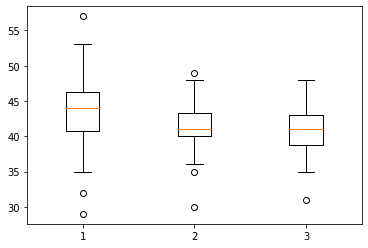

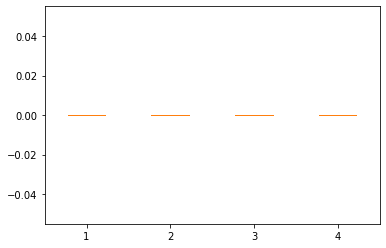

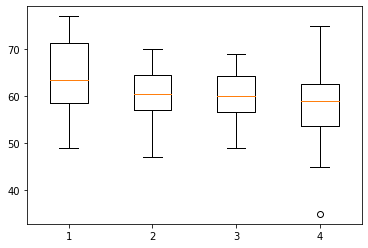

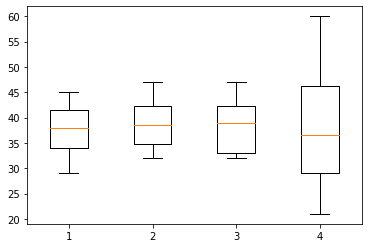

In [19]:
plt.boxplot([wheelCount_lhs[:,0],wheelCount_clusterrand[:,0], wheelCount_clustersort[:,0]] )
plt.figure()
plt.boxplot([sensorCount_lhs[:,0],sensorCount_clusterrand[:,0], sensorCount_clustersort[:,0], sensorCount_spasort[:,0]] )
plt.figure()
plt.boxplot([casterCount_lhs[:,0],casterCount_clusterrand[:,0], casterCount_clustersort[:,0], casterCount_spasort[:,0]] )
plt.figure()
plt.boxplot([jointCount_lhs[:,0],jointCount_clusterrand[:,0], jointCount_clustersort[:,0], jointCount_spasort[:,0]] )

{'boxes': [<matplotlib.lines.Line2D at 0x7ffa51e52cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffa51e62550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffa51e62dd8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffa51e62b00>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffa51e52f60>,
  <matplotlib.lines.Line2D at 0x7ffa51e0def0>]}

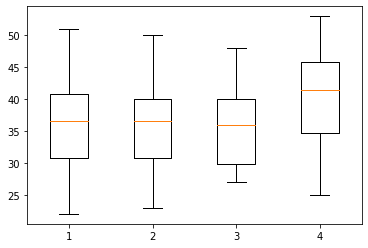

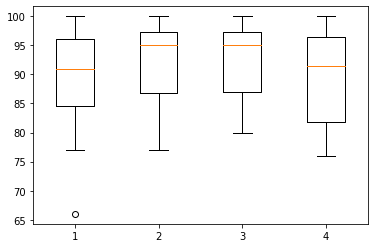

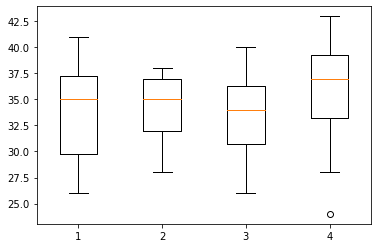

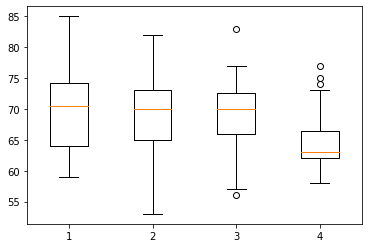

In [90]:
plt.boxplot([wheelCount_lhs[:,1],wheelCount_clusterrand[:,1], wheelCount_clustersort[:,1], wheelCount_spasort[:,1]] )
plt.figure()
plt.boxplot([sensorCount_lhs[:,1],sensorCount_clusterrand[:,1], sensorCount_clustersort[:,1], sensorCount_spasort[:,1]] )
plt.figure()
plt.boxplot([casterCount_lhs[:,1],casterCount_clusterrand[:,1], casterCount_clustersort[:,1], casterCount_spasort[:,1]] )
plt.figure()
plt.boxplot([jointCount_lhs[:,1],jointCount_clusterrand[:,1], jointCount_clustersort[:,1], jointCount_spasort[:,1]] )

{'boxes': [<matplotlib.lines.Line2D at 0x7f8f7e7392e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8f7e739b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f7e7493c8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f7e7490f0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8f7e739550>,
  <matplotlib.lines.Line2D at 0x7f8f7e6f6198>]}

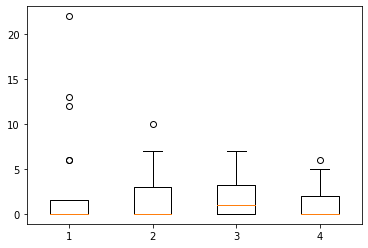

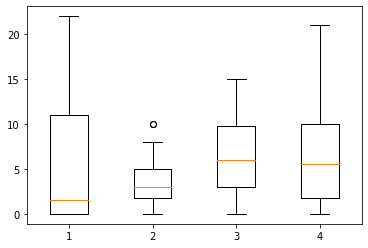

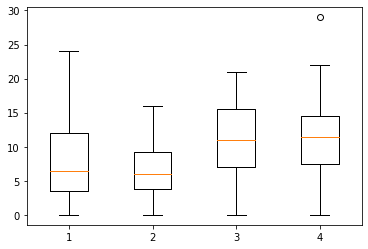

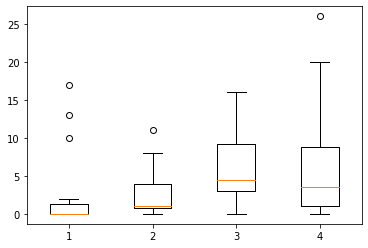

In [193]:
plt.boxplot([wheelCount_lhs[:,2],wheelCount_clusterrand[:,2], wheelCount_clustersort[:,2], wheelCount_spasort[:,2]] )
plt.figure()
plt.boxplot([sensorCount_lhs[:,2],sensorCount_clusterrand[:,2], sensorCount_clustersort[:,2], sensorCount_spasort[:,2]] )
plt.figure()
plt.boxplot([casterCount_lhs[:,2],casterCount_clusterrand[:,2], casterCount_clustersort[:,2], casterCount_spasort[:,2]] )
plt.figure()
plt.boxplot([jointCount_lhs[:,2],jointCount_clusterrand[:,2], jointCount_clustersort[:,2], jointCount_spasort[:,2]] )

{'boxes': [<matplotlib.lines.Line2D at 0x7f8f7e937a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8f7e9482e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f7e948b70>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f7e948898>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8f7e937cf8>,
  <matplotlib.lines.Line2D at 0x7f8f7e8e76a0>]}

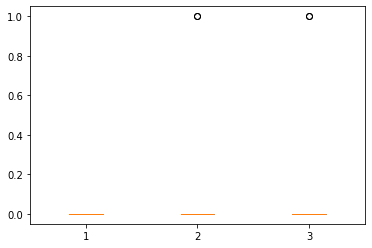

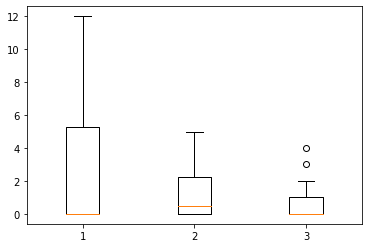

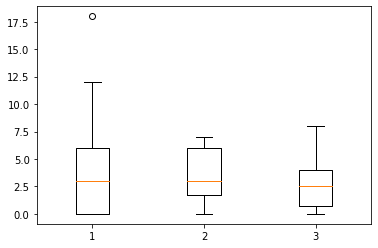

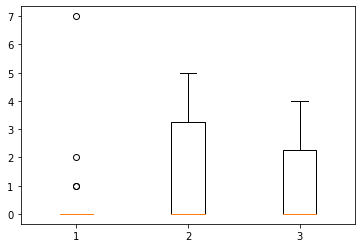

In [169]:
plt.boxplot([wheelCount_lhs[:,3],wheelCount_clusterrand[:,3], wheelCount_clustersort[:,3]] )
plt.figure()
plt.boxplot([sensorCount_lhs[:,3],sensorCount_clusterrand[:,3], sensorCount_clustersort[:,3]] )
plt.figure()
plt.boxplot([casterCount_lhs[:,3],casterCount_clusterrand[:,3], casterCount_clustersort[:,3]] )
plt.figure()
plt.boxplot([jointCount_lhs[:,3],jointCount_clusterrand[:,3], jointCount_clustersort[:,3]] )